In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [23]:
df = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')

In [24]:
df.drop(199295, inplace=True)

In [36]:
df.shape

(440832, 17)

In [25]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

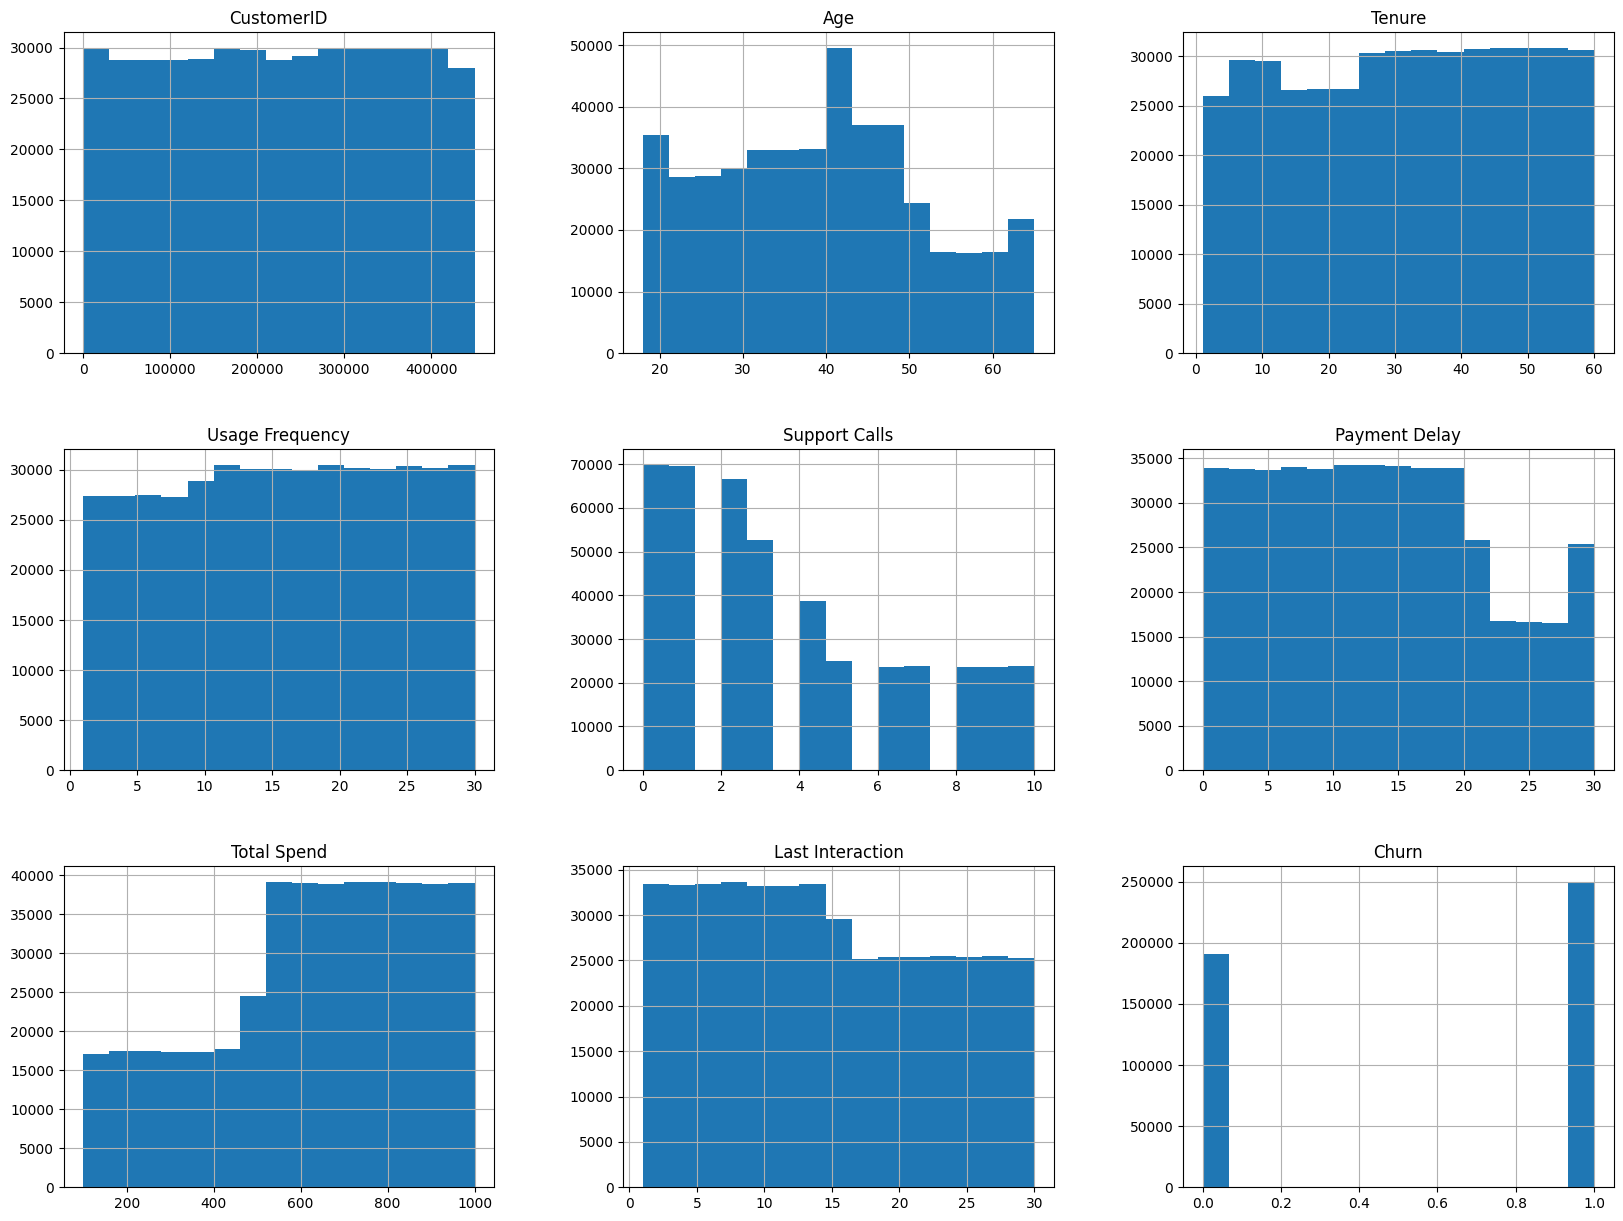

In [26]:
df.hist(bins=15, figsize=(20,15))

<Axes: xlabel='Age', ylabel='Churn'>

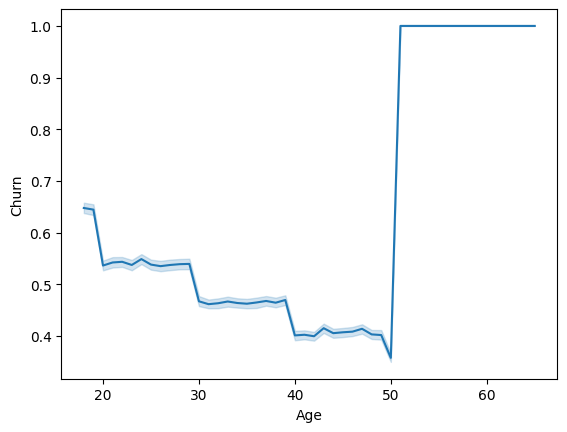

In [27]:
sns.lineplot(x=df['Age'], y=df['Churn'])

In [28]:
#Perform one-hot encoding
df_gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = df.join(df_gender)
df.drop(columns='Gender', inplace=True)

df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [29]:
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,0,0,1,1,0,0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,1,0,0,0,1,0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,1,0,0,0,0,1
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,0,1,0,1,0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,1,0,0,0,1,0


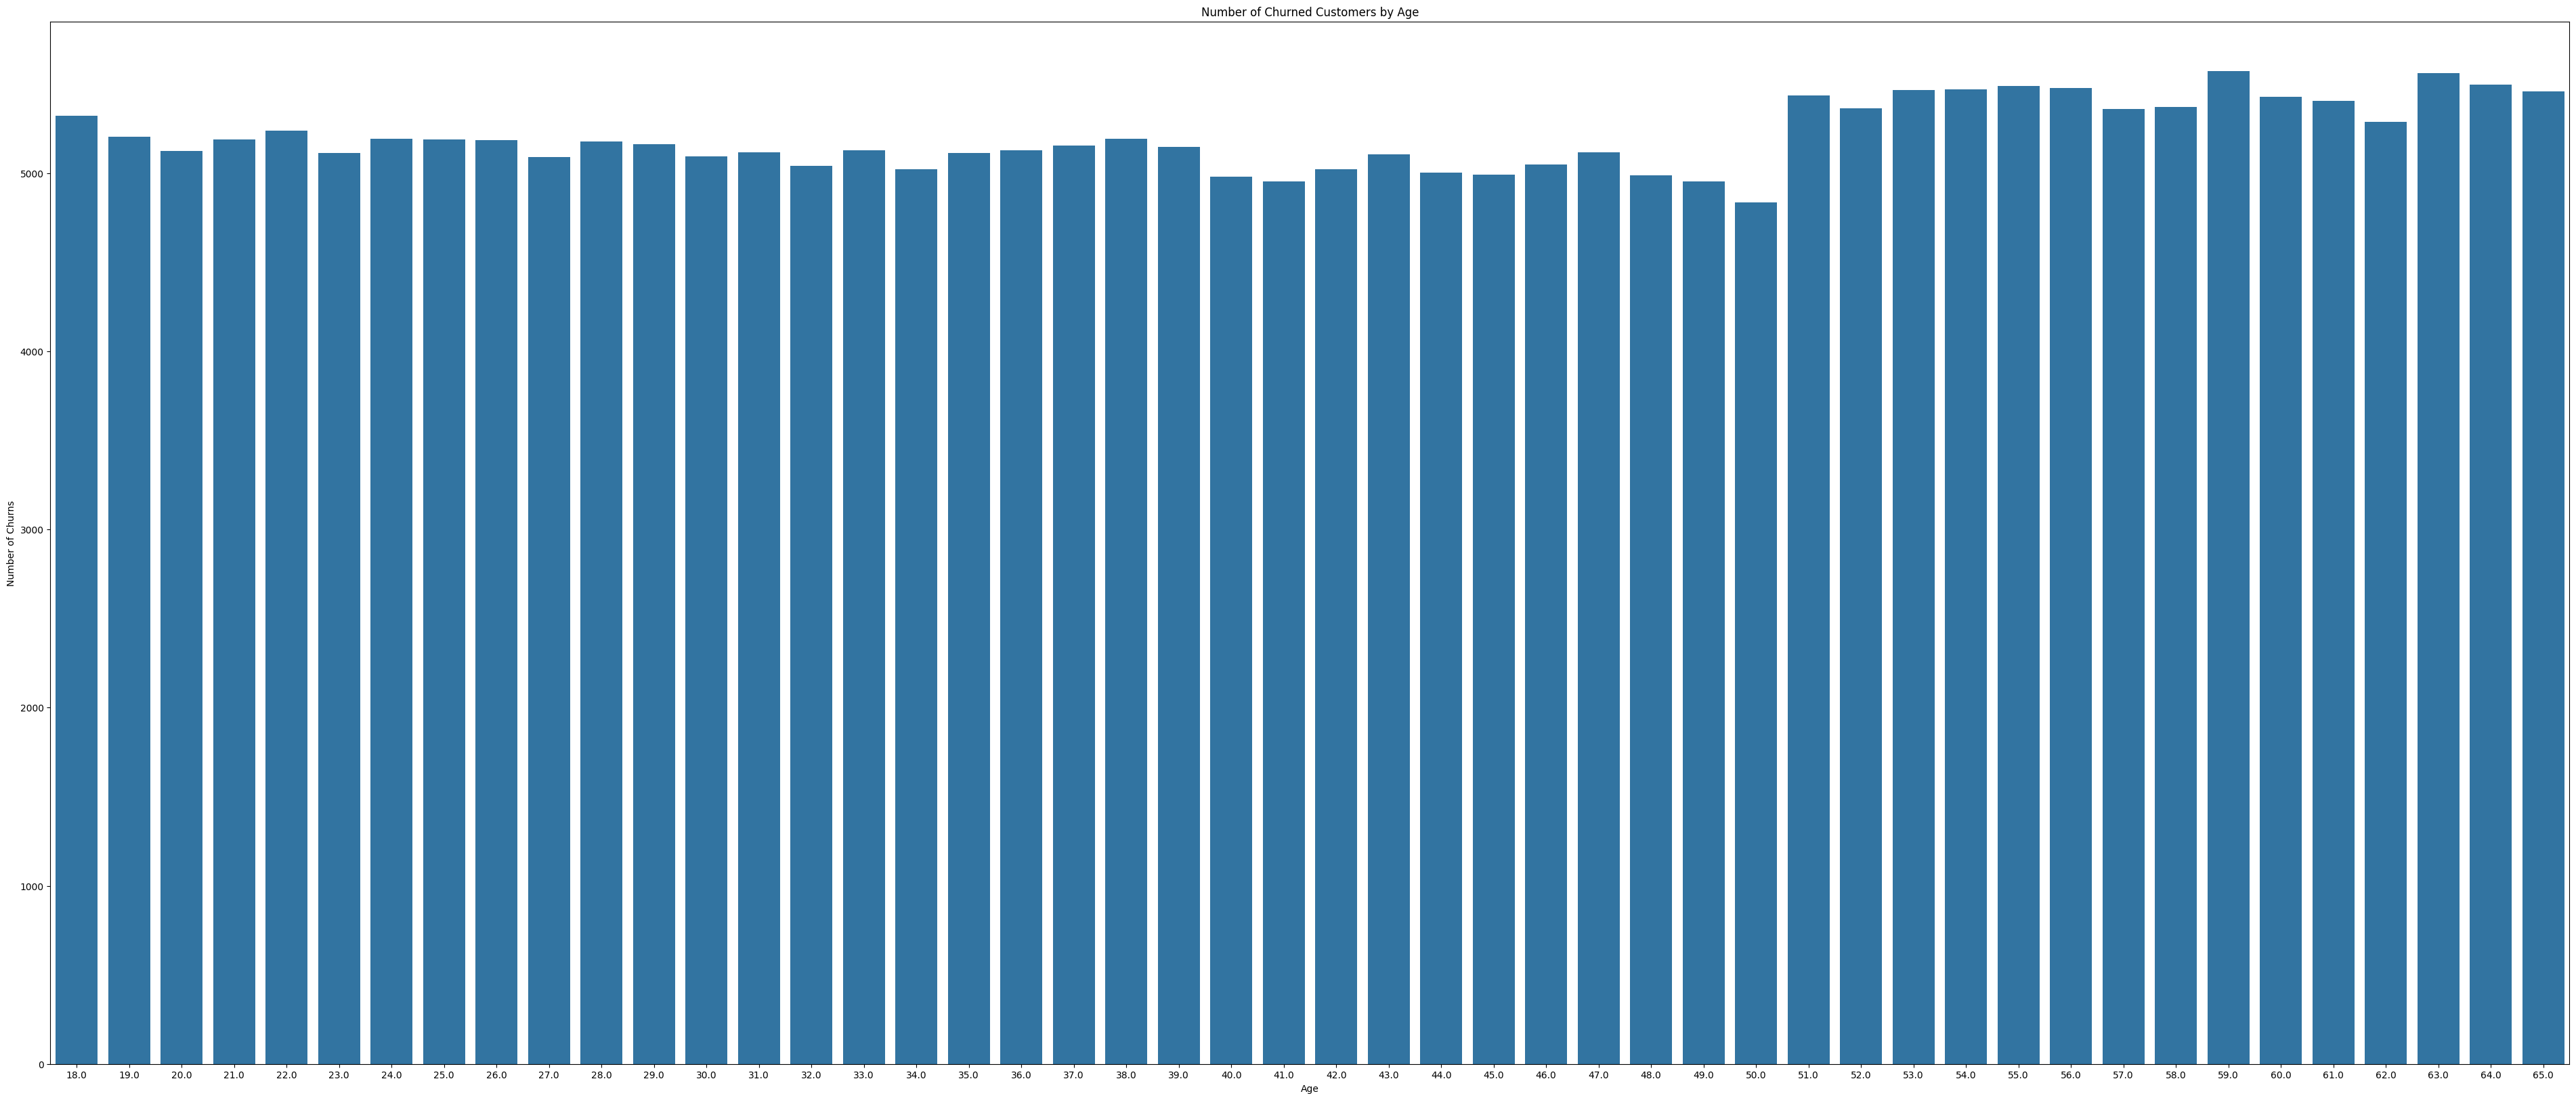

In [30]:
def churn_rate_by_col(col:str):
    churn = df[df['Churn']==1]

    length = df[col].nunique()


    churn_count_by_col = churn.groupby(col).size().reset_index(name='Churn Count')

    
    # Create a bar plot
    plt.figure(figsize=(length, 20))
    sns.barplot(x=f'{col}', y='Churn Count', data=churn_count_by_col)

    # Add titles and labels
    plt.title(f'Number of Churned Customers by {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of Churns')

    # Show the plot
    plt.show()



# churn_rate_by_col("Total Spend")
churn_rate_by_col("Age")

In [31]:
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,0,0,1,1,0,0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,1,0,0,0,1,0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,1,0,0,0,0,1
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,0,1,0,1,0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,1,0,0,0,1,0


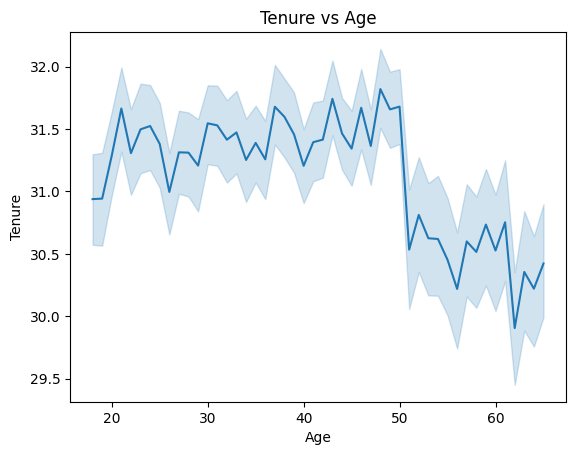

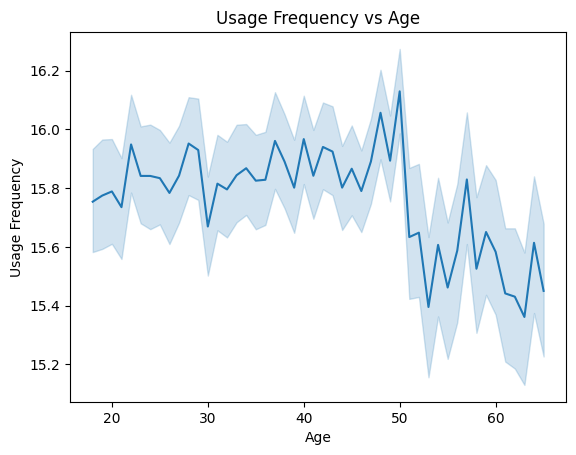

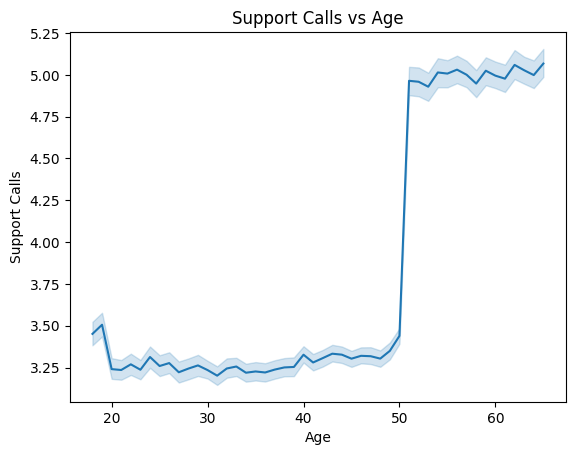

<Figure size 640x480 with 0 Axes>

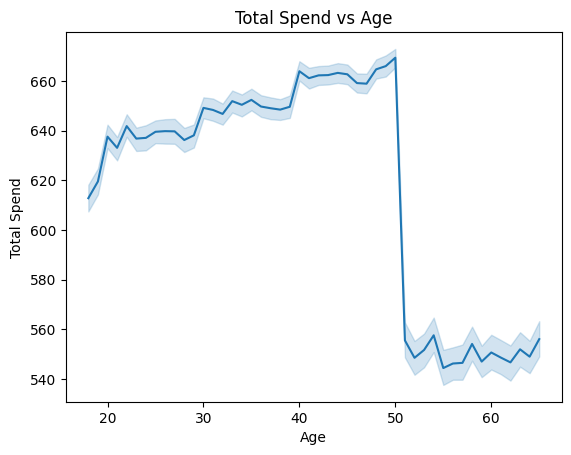

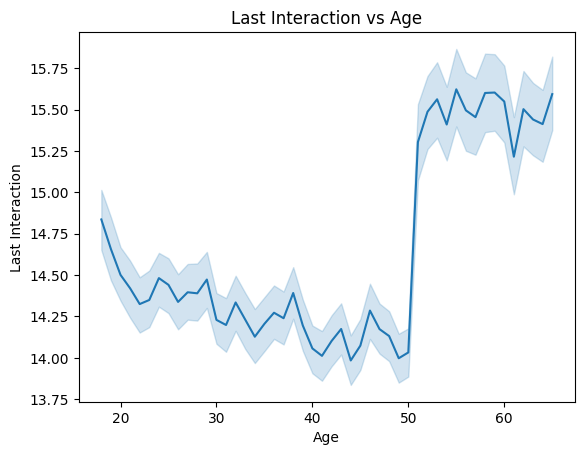

In [35]:
#continuous features relative age 

age = df['Age']
features = ["Tenure", "Usage Frequency", "Support Calls", "Payment Delays", "Total Spend", "Last Interaction"]

for col in features:
    try:
        plt.figure()  # Create a new figure
        sns.lineplot(x=age, y=df[col])
        plt.title(f'{col} vs Age') 
        plt.show()  # Display the plot
    except KeyError:
        continue